* Generally we would call DL models as black boxes and difficult to learn representations from. 
* At least in human readable format.
* Representations learnt by convnets are highly amendable to visualizations since they are representations of visual learnings
* We can visualize 
> Intermediate Convnet outputs

> Convnet filters

> Heatmaps of class activations

# Intermediate Activations

In [28]:
# Display the feature maps -> outputs of various convolution and pooling functions (layers)
# How an input is decomposed into different filters learned by the network
# Each channel encodes relatively different independent features

# from keras.models import load_model 
# model = load_model("model1.keras")
# model.summary(expand_nested=True)

In [ ]:
#GPT 5 generated code for model unwrapping to make vis more simpler to look at

import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Flatten, Dense

# Load your saved model
m = load_model("model1.keras", compile=False)

# Grab the VGG16 submodel and *its internal output* (last pooling layer)
base = m.get_layer("vgg16")
x = base.get_layer("block5_pool").output   # (uses the real internal layer tensor)

# Recreate your head layers with identical configs and copy weights
flatten_old = m.get_layer("flatten_2")
dense10_old = m.get_layer("dense_10")
dense11_old = m.get_layer("dense_11")

flatten = Flatten(**flatten_old.get_config())
x = flatten(x)
dense10 = Dense.from_config(dense10_old.get_config())
x = dense10(x)
dense11 = Dense.from_config(dense11_old.get_config())
out = dense11(x)

#  Build the new, flat model and load weights into the new head layers
unwrapped = Model(inputs=base.input, outputs=out, name="vgg16_unwrapped")

flatten.set_weights(flatten_old.get_weights())
dense10.set_weights(dense10_old.get_weights())
dense11.set_weights(dense11_old.get_weights())

model = unwrapped
model.summary()

Model: "vgg16_unwrapped"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [25]:
from keras.preprocessing import image 
import numpy as np 

img_path = "pizza_not_pizza\\pizza\\29417.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
img_tensor.shape 

(1, 150, 150, 3)

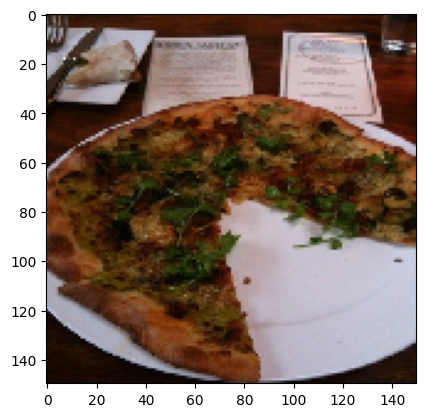

In [26]:
import matplotlib.pyplot as plt 

plt.imshow(img)

In [32]:
layer_outputs = [layer.output for layer in model.layers[:8]]
layer_outputs

[<KerasTensor shape=(None, 150, 150, 3), dtype=float32, sparse=False, ragged=False, name=input_layer_6>,
 <KerasTensor shape=(None, 150, 150, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_249>,
 <KerasTensor shape=(None, 150, 150, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_251>,
 <KerasTensor shape=(None, 75, 75, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_253>,
 <KerasTensor shape=(None, 75, 75, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_255>,
 <KerasTensor shape=(None, 75, 75, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_257>,
 <KerasTensor shape=(None, 37, 37, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_259>,
 <KerasTensor shape=(None, 37, 37, 256), dtype=float32, sparse=False, ragged=False, name=keras_tensor_261>]

In [40]:
# In keras for a model we require an input tensor (or list) and output tensor (or list)

from keras import models
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

#We are taking 8 layers, each one will have their own activation output 

activations = activation_model.predict(img_tensor)
print(len(activations))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
8


Shape of layer 1 activation : (1, 150, 150, 3)


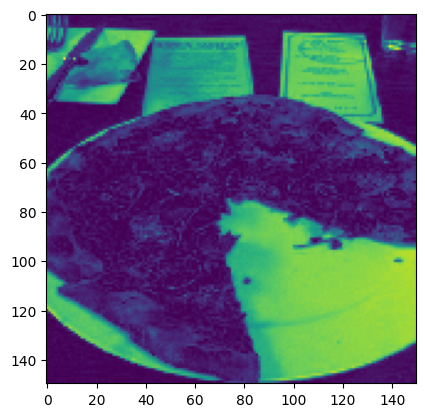

In [ ]:
# We are getting 8 outputs, each output is from one layer
# We basically instatiated a multi output model 

first_layer_activation = activations[0]
print("Shape of layer 1 activation :",first_layer_activation.shape)

plt.imshow(first_layer_activation[0, :, :, 2], cmap="viridis") #Second channel of the activation of the first layer

Shape of layer 2 activation : (1, 150, 150, 64)


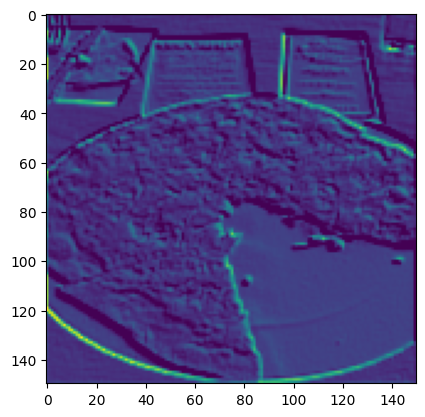

In [ ]:
second_layer_activation = activations[1]
print("Shape of layer 2 activation :",second_layer_activation.shape)

plt.imshow(second_layer_activation[0, :, :, 4], cmap="viridis") # 4 channel of the activation

Shape of layer 2 activation : (1, 150, 150, 64)


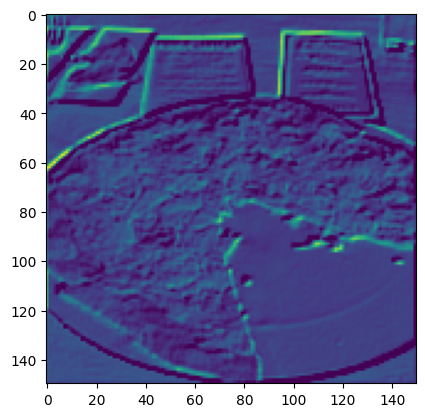

In [61]:
second_layer_activation = activations[1]
print("Shape of layer 2 activation :",second_layer_activation.shape)

plt.imshow(second_layer_activation[0, :, :, 53], cmap="viridis") # 53channel of the activation

We can see that for the same layer and activation feature map, different channels seem to be working/learning different abstract features

Shape of layer 8 activation : (1, 37, 37, 256)


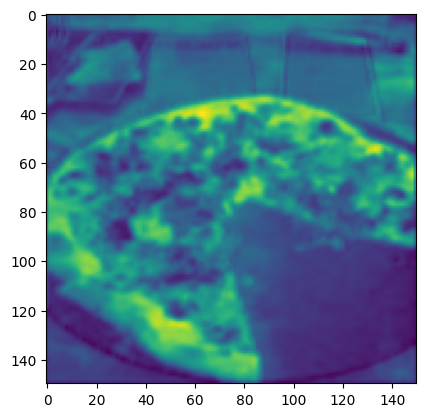

In [75]:
eight_layer_activation = activations[7]
print("Shape of layer 8 activation :",eight_layer_activation.shape)

plt.imshow(second_layer_activation[0, :, :, 1], cmap="viridis") # 53channel of the activation

* First layer acts as an edge detector. Collections of edge detectors. At this stage the activations still retain almost all information present in the initial picture
* Higher up activations become more abstract and less visually interpretable. Begin to encode higher level concepts like pizza crust shape, etc.
